# Titanic - Machine Learning From Disaster

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading training dataset
df_train = pd.read_csv('dataset/train.csv')
df_train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [3]:
#removing unnecessary columns
df_train.drop(columns= ["PassengerId", "Name", "Ticket", "Fare", "Cabin"], inplace=True)
df_train.head()

Survived  Pclass     Sex   Age  SibSp  Parch Embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [5]:
df_train.describe()

Survived      Pclass         Age       SibSp       Parch
count  891.000000  891.000000  714.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594
std      0.486592    0.836071   14.526497    1.102743    0.806057
min      0.000000    1.000000    0.420000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000
50%      0.000000    3.000000   28.000000    0.000000    0.000000
75%      1.000000    3.000000   38.000000    1.000000    0.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000

In [6]:
#filling null values of age with median
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [7]:
#filling null values of embarked with mode
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

In [8]:
df_train.head()

Survived  Pclass     Sex   Age  SibSp  Parch Embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S

## Exploratory Data Analysis (EDA)

In [9]:
#finding out the death and survived percentage
no_of_passengers = df_train['Survived'].value_counts()
no_of_deaths = no_of_passengers[0]
no_of_survived = no_of_passengers[1]
percent_death = (no_of_deaths/(no_of_deaths+no_of_survived))*100
percent_survived = (no_of_survived/(no_of_deaths+no_of_survived))*100

print("Total Deaths:", no_of_deaths)
print("Total Survived:", no_of_survived)
print("Passengers Death Percent:", percent_death)
print("Passengers Survival Percent:", percent_survived)

Total Deaths: 549
Total Survived: 342
Passengers Death Percent: 61.61616161616161
Passengers Survival Percent: 38.38383838383838


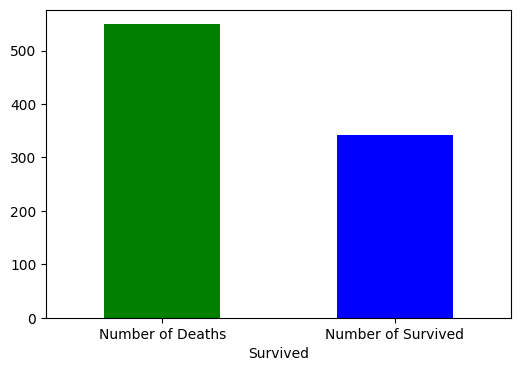

In [10]:
#bar plot showing number of dead and survived passengers
objects = ('Number of Deaths', 'Number of Survived')
bars = np.arange(len(objects))
no_of_passengers.plot(kind='bar', figsize=(6,4), color=['g', 'b'])
plt.xticks(bars, objects, rotation=0)
plt.show()

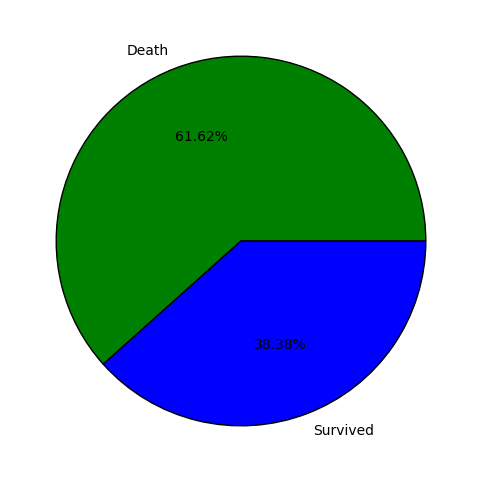

In [11]:
#pie chart
plt.figure(figsize=(10,6))
colors = ['g', 'b']
labels = ['Death', 'Survived']
plt.pie(no_of_passengers, colors=colors, labels=labels, autopct='%.2f%%', wedgeprops={'edgecolor':'black'})
plt.show()

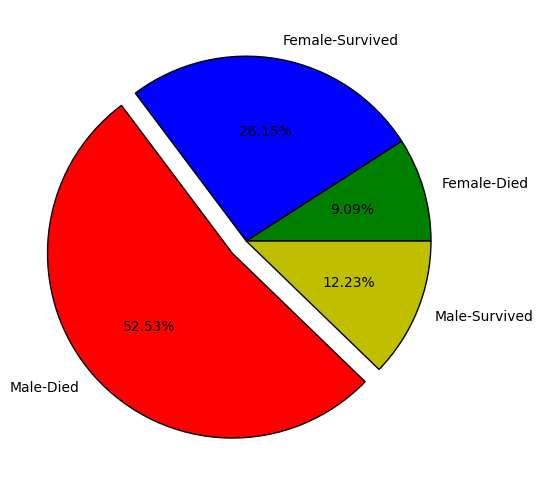

In [12]:
#pie chart for gender survived and dead
plt.figure(figsize=(10,6))
gender = df_train.groupby('Sex').size()
gender_survival = df_train.groupby(['Sex','Survived']).size()
color = ['g', 'b', 'r', 'y']
label = ['Female-Died', 'Female-Survived', 'Male-Died', 'Male-Survived']
plt.pie(gender_survival, colors=color, labels=label, autopct='%.2f%%', wedgeprops={'edgecolor':'black'}, explode=[0,0,0.1,0])
plt.show()

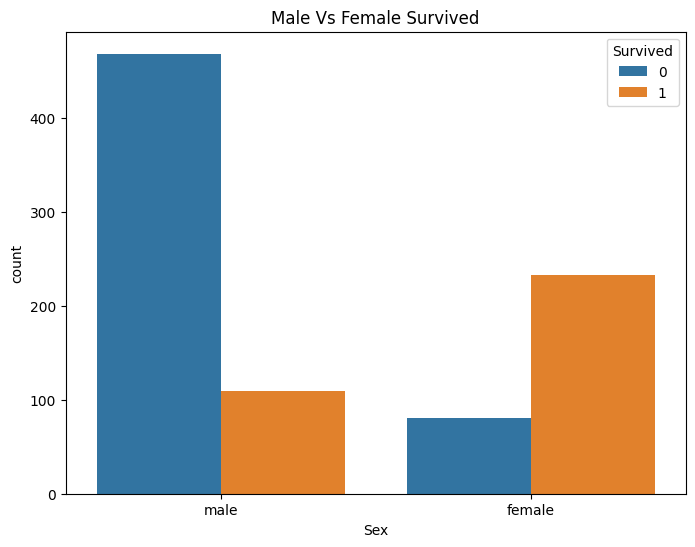

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', hue='Survived', data=df_train)
plt.title("Male Vs Female Survived")
plt.show()

It is evident from above plots that females survival rate is higher as compared to male, as we all know that women and children first protocol was followed

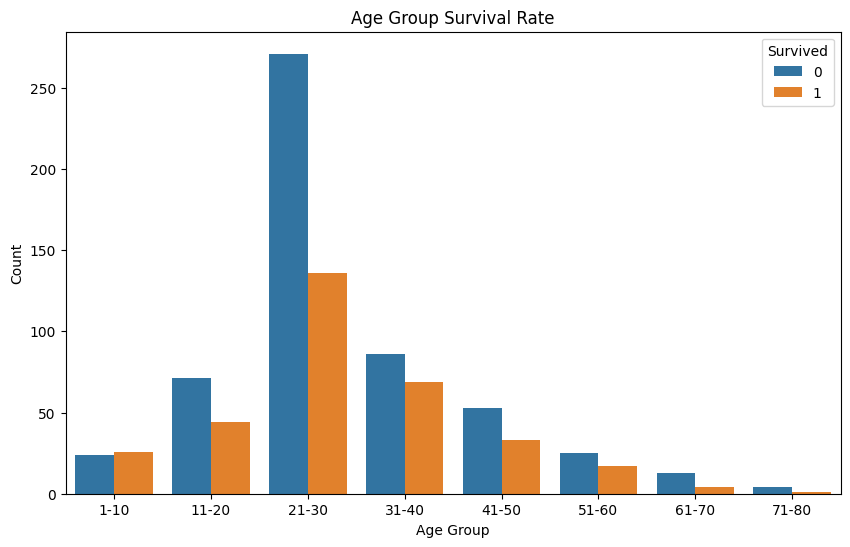

In [14]:
#plotting survival rate by age group
bins = [1, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df_train['age_group'] = pd.cut(df_train['Age'], bins=bins, labels=labels)
plt.figure(figsize=(10,6))
sns.countplot(x='age_group', hue='Survived', data=df_train)
plt.title("Age Group Survival Rate")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()


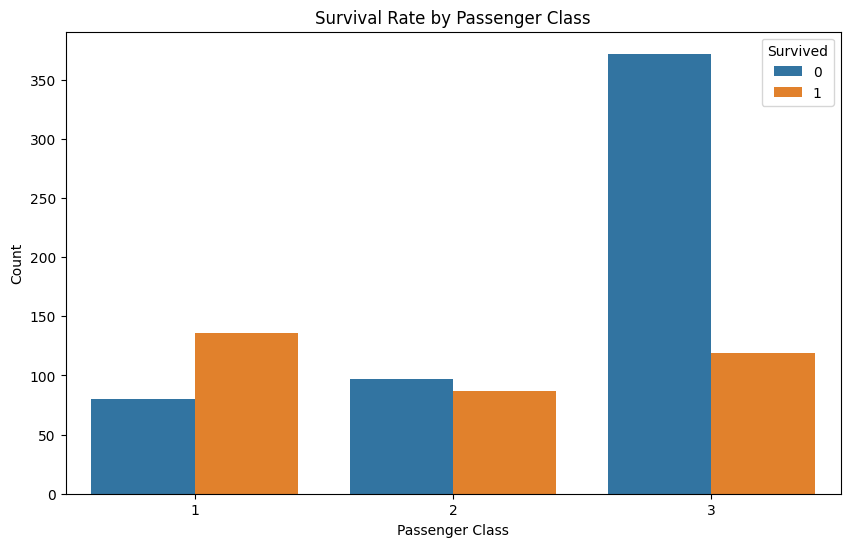

In [15]:
#survival rate by passenger class
plt.figure(figsize=(10,6))
sns.countplot(x='Pclass', hue='Survived', data=df_train)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()


It is also clear from the above plot that passenger class 3 are the most who lost their lives while most of the class 1 passengers survived

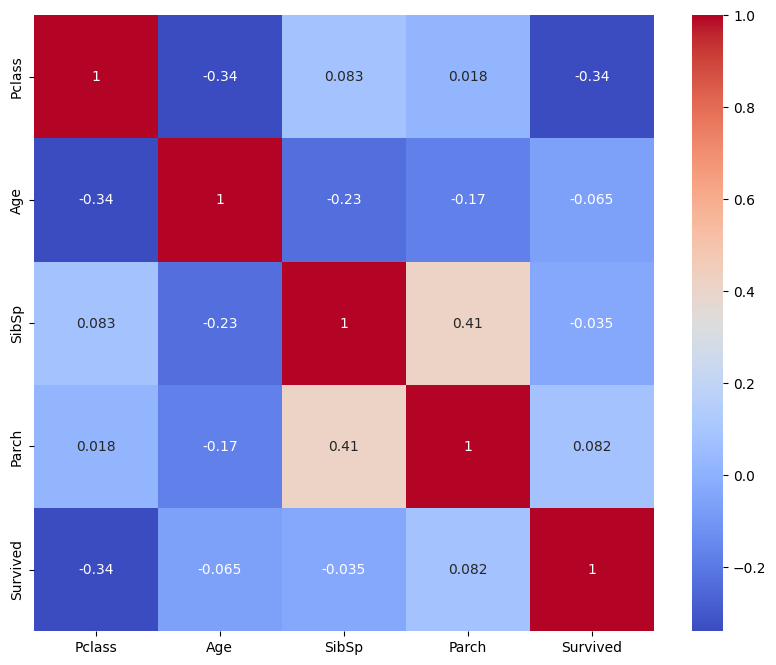

In [16]:
cor_matrix = df_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Survived']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')
plt.show()

In [17]:
df_train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    int64   
 1   Pclass     891 non-null    int64   
 2   Sex        891 non-null    object  
 3   Age        891 non-null    float64 
 4   SibSp      891 non-null    int64   
 5   Parch      891 non-null    int64   
 6   Embarked   891 non-null    object  
 7   age_group  877 non-null    category
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 50.1+ KB


## Splitting The DataSet

In [19]:
#removing unnecessary column
x = df_train.drop(columns=["Survived", "age_group"])
y = df_train["Survived"]
display(x.head())
display(y.head())

Pclass     Sex   Age  SibSp  Parch Embarked
0       3    male  22.0      1      0        S
1       1  female  38.0      1      0        C
2       3  female  26.0      0      0        S
3       1  female  35.0      1      0        S
4       3    male  35.0      0      0        S

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [20]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Embarked  891 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


In [21]:
#encoding string columns
x = pd.get_dummies(x, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)
x.head(10)

Pclass   Age  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S
0       3  22.0      1      0         1           0           1
1       1  38.0      1      0         0           0           0
2       3  26.0      0      0         0           0           1
3       1  35.0      1      0         0           0           1
4       3  35.0      0      0         1           0           1
5       3  28.0      0      0         1           1           0
6       1  54.0      0      0         1           0           1
7       3   2.0      3      1         1           0           1
8       3  27.0      0      2         0           0           1
9       2  14.0      1      0         0           0           0

In [22]:
#splitting the data set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=45)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 7)
(712,)
(179, 7)
(179,)


In [23]:
#scaling numerical columns
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
#using random forest 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(
    criterion = 'gini',
    max_depth = 8,
    min_samples_split=10,
    random_state=5
)

In [25]:
clf.fit(x_train_scaled ,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [26]:
clf.feature_importances_

array([0.17608738, 0.21909908, 0.06136052, 0.05585611, 0.43970225,
       0.01937117, 0.0285235 ])

In [27]:
#predicion of test data
y_pred =clf.predict(x_test_scaled)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [28]:
#making data frame for testing predictions
pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})

y_test  y_pred
248       1       0
197       0       0
133       1       1
169       0       0
736       0       0
..      ...     ...
886       0       0
751       1       1
804       1       0
596       1       1
231       0       0

[179 rows x 2 columns]

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
confusion_matrix (y_test,y_pred)

array([[108,   9],
       [ 15,  47]], dtype=int64)

In [30]:
accuracy_score(y_test,y_pred)

0.8659217877094972

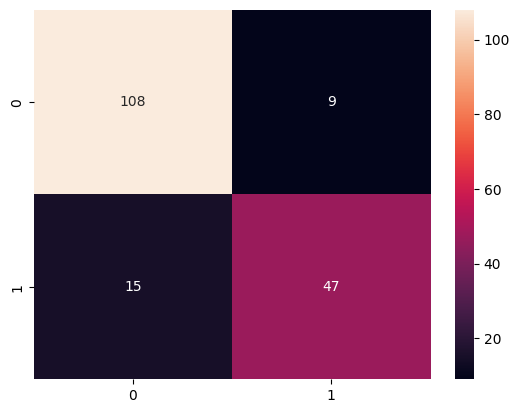

In [31]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.show()

In [32]:
# cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(clf,x_train_scaled,y_train,cv=5)

array([0.81118881, 0.8041958 , 0.77464789, 0.78169014, 0.76760563])

In [33]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       123
           1       0.76      0.84      0.80        56

    accuracy                           0.87       179
   macro avg       0.84      0.86      0.85       179
weighted avg       0.87      0.87      0.87       179



Text(0.5, 1.0, 'Feature Importance')

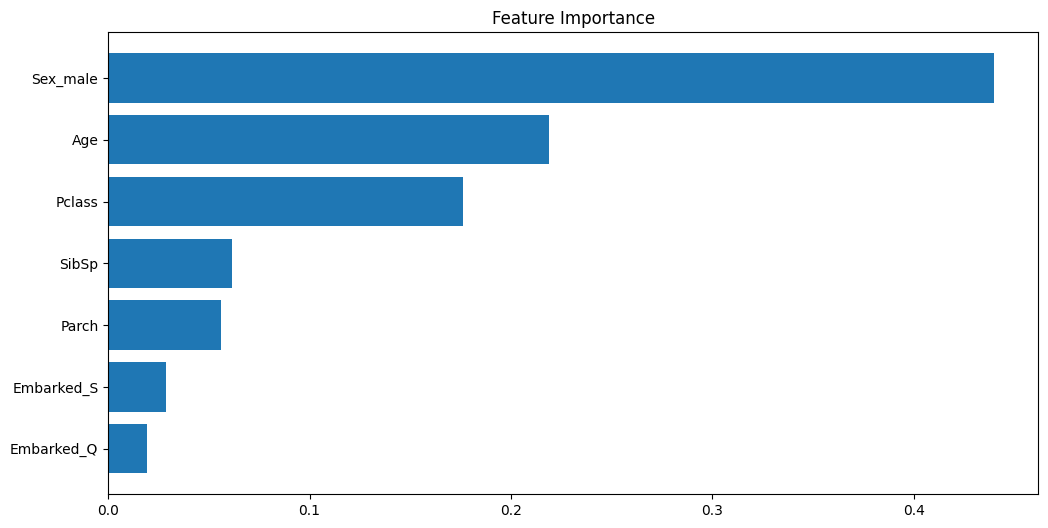

In [34]:
#feature importance
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('Feature Importance')

## Test CSV Predictions

In [35]:
#loading testing dataset
df_test = pd.read_csv('dataset/test.csv')
df_test.head(10)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1  47.0      1      0     363272   7.0000   NaN        S  
2  62.0      0      0     240276   9.6875   NaN        Q  
3  27.0      0      0     315154   8.6625   NaN        S  
4  22.0      1      1    3101298  12.2875   NaN        S  
5  14.0      0      0       7538   9.2250   NaN        S  
6  30.0      0      0     330972   7.6292   NaN        Q  
7  26.0      1      1     248738  29.0000   NaN        S  
8  18.0      0      0       2657   7.2292   NaN        C  
9  21.0      2      0  A/4 48871  24.1500   NaN        S

In [36]:
#storing passenger_id into variable to use it in final csv as per requirement
passenger_ids = df_test['PassengerId']

In [38]:
df_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], inplace=True)
df_test.head()

Pclass     Sex   Age  SibSp  Parch Embarked
0       3    male  34.5      0      0        Q
1       3  female  47.0      1      0        S
2       2    male  62.0      0      0        Q
3       3    male  27.0      0      0        S
4       3  female  22.0      1      1        S

In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


In [43]:
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)

In [45]:
#encoding test csv columns
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)
df_test.head()

Pclass   Age  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S
0       3  34.5      0      0         1           1           0
1       3  47.0      1      0         0           0           1
2       2  62.0      0      0         1           1           0
3       3  27.0      0      0         1           0           1
4       3  22.0      1      1         0           0           1

In [46]:
# scaling test csv numerical columns
df_test_scaled = scaler.transform(df_test)
df_test_scaled

array([[ 0.84233261,  0.38425115, -0.47477376, ...,  0.73561236,
         3.32682981, -1.62827579],
       [ 0.84233261,  1.35405127,  0.42907362, ..., -1.35941164,
        -0.30058646,  0.61414657],
       [-0.34527297,  2.5178114 , -0.47477376, ...,  0.73561236,
         3.32682981, -1.62827579],
       ...,
       [ 0.84233261,  0.69458719, -0.47477376, ...,  0.73561236,
        -0.30058646,  0.61414657],
       [ 0.84233261, -0.19762892, -0.47477376, ...,  0.73561236,
        -0.30058646,  0.61414657],
       [ 0.84233261, -0.19762892,  0.42907362, ...,  0.73561236,
        -0.30058646, -1.62827579]])

In [47]:
#prediction
predict = clf.predict(df_test_scaled)
output = pd.DataFrame({'PassengerId': passenger_ids, 'Survived':predict})
output

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [48]:
# saving final output file as per requirement
output.to_csv('predicted_output.csv', index=False)